In [0]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
def funny(x):
    global max
    global min
    global upper_quartile
    global lower_quartile
    if(x >upper_quartile and x<=max ):
        return(upper_quartile) 
    elif(x < lower_quartile and x>=min):
        return(lower_quartile) 
    else: 
        return(x)

In [0]:
df=pd.read_csv("framingham.csv")
df.shape

(4240, 16)

In [0]:
df.info()
#AS PER THE INFO ALL VARIABLES ARE SCALE VARIABLES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [0]:
pd.isnull(df).sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
import pandas_profiling
eda_report_heart=pandas_profiling.ProfileReport(df)
eda_report_heart
eda_report_heart.to_file("eda_report_heart.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,4240
Total Missing (%),1.0%
Total size in memory,530.1 KiB
Average record size in memory,128.0 B
Numeric,10
Categorical,0
Boolean,6
Date,0
Text (Unique),0
Rejected,0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


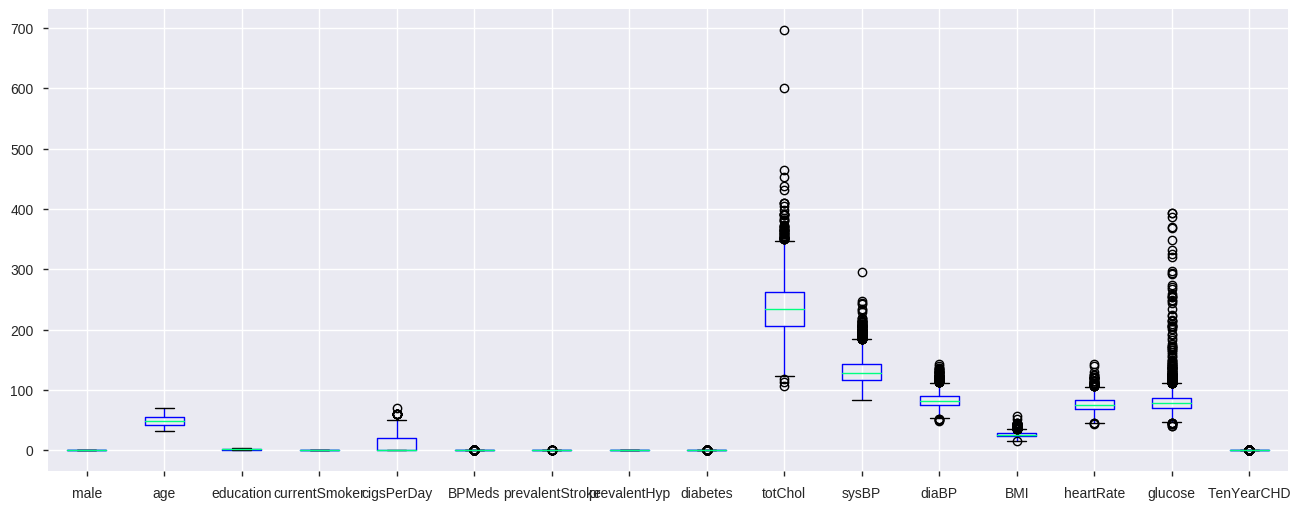

In [0]:
#PLOTTING BOX PLOTS FOR ALL VARIABLES
df
df.plot(kind='box', stacked=True, figsize=[16,6], colormap='winter') 

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

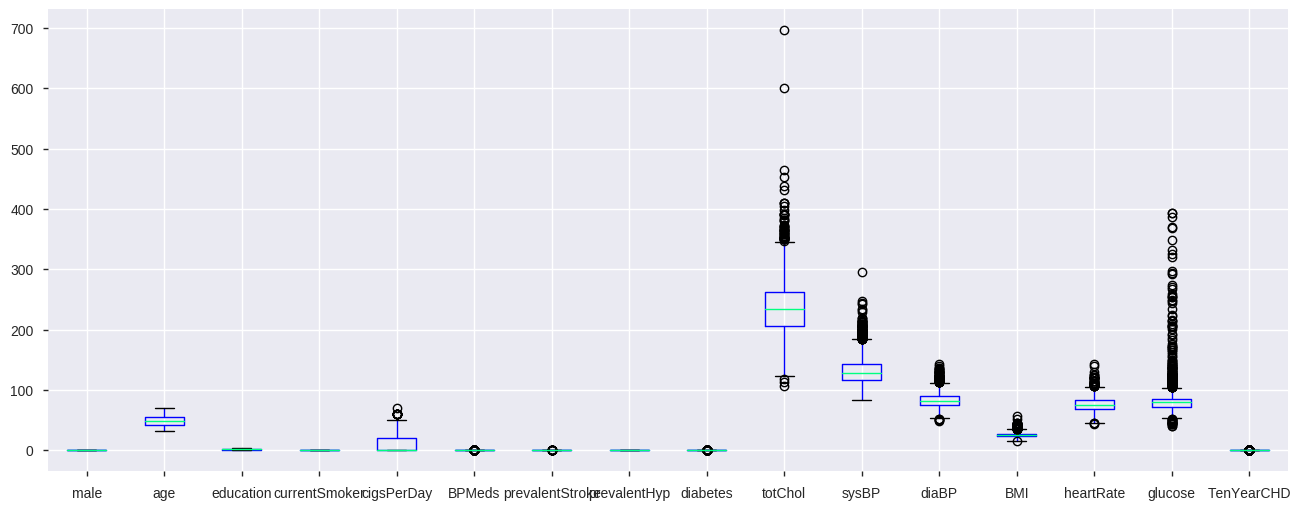

In [0]:
#REPLACING MISSING VALUES 
df['totChol'].fillna(df.totChol.mean(),inplace=True)
df['BMI'].fillna(df.BMI.mean(),inplace=True)
df['glucose'].fillna(df.glucose.mean(),inplace=True)
df['cigsPerDay'].fillna(df.cigsPerDay.mean(),inplace=True)
df['BPMeds'].fillna(df.BPMeds.mode()[0],inplace=True)
df['heartRate'].fillna(df.heartRate.mean(),inplace=True)
pd.isnull(df).sum()
df.plot(kind='box', stacked=True, figsize=[16,6], colormap='winter') 


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

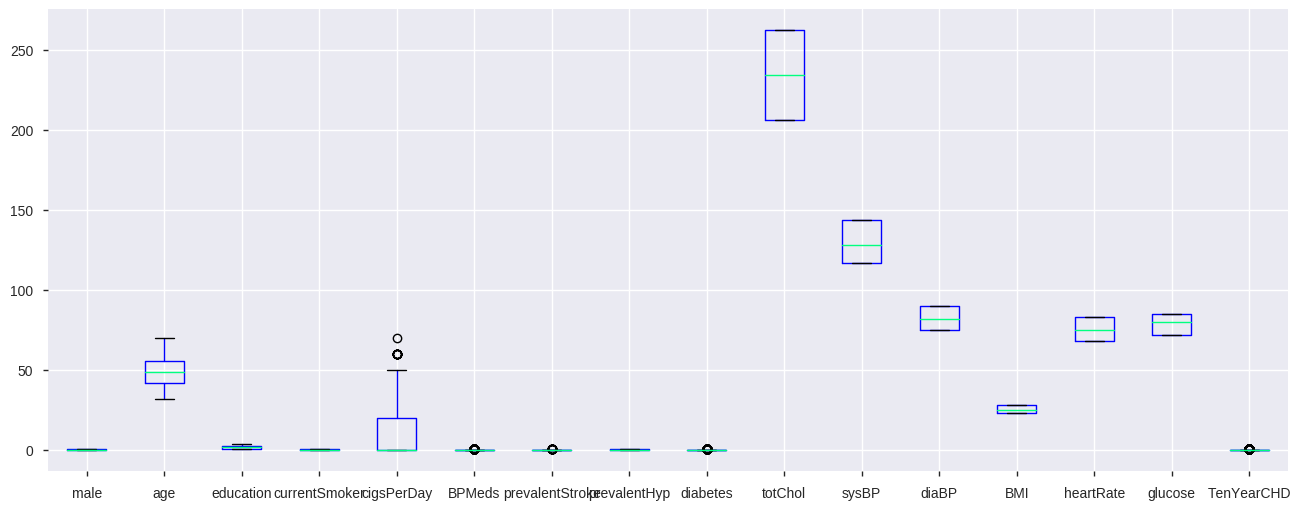

In [0]:
# REMOVING OUTLIERS
upper_quartile = np.percentile(df['totChol'], 75)
lower_quartile = np.percentile(df['totChol'], 25)
max=df.totChol.max()
min=df.totChol.min()
df['totChol']=df['totChol'].apply(funny)
upper_quartile = np.percentile(df['glucose'], 75)
lower_quartile = np.percentile(df['glucose'], 25)
max=df.glucose.max()
min=df.glucose.min()
df['glucose']=df['glucose'].apply(funny)
upper_quartile = np.percentile(df['sysBP'], 75)
lower_quartile = np.percentile(df['sysBP'], 25)
max=df.sysBP.max()
min=df.sysBP.min()
df['sysBP']=df['sysBP'].apply(funny)
upper_quartile = np.percentile(df['diaBP'], 75)
lower_quartile = np.percentile(df['diaBP'], 25)
max=df.diaBP.max()
min=df.diaBP.min()
df['diaBP']=df['diaBP'].apply(funny)
upper_quartile = np.percentile(df['BMI'], 75)
lower_quartile = np.percentile(df['BMI'], 25)
max=df.BMI.max()
min=df.BMI.min()
df['BMI']=df['BMI'].apply(funny)
upper_quartile = np.percentile(df['heartRate'], 75)
lower_quartile = np.percentile(df['heartRate'], 25)
max=df.heartRate.max()
min=df.heartRate.min()
df['heartRate']=df['heartRate'].apply(funny)
df.plot(kind='box', stacked=True, figsize=[16,6], colormap='winter') 
pd.isnull(df).sum()


0    3596
1     644
Name: TenYearCHD, dtype: int64

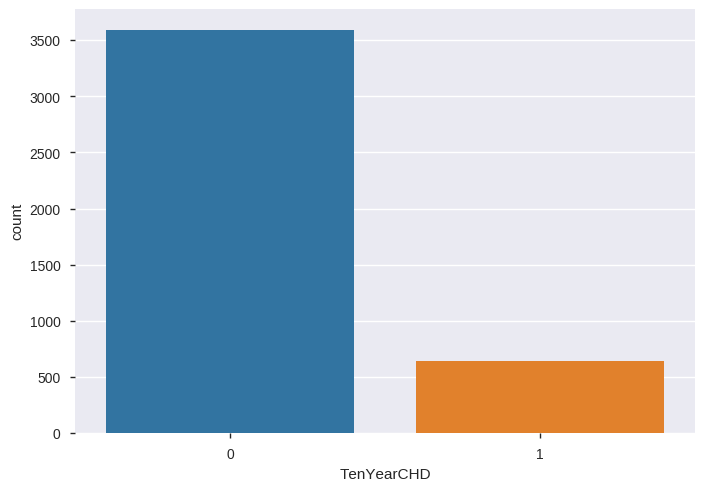

In [0]:
#PLOTTING BOX PLOT AND DETERMINING TRUE AND FALSE VALUES FOR CHD
df.TenYearCHD.value_counts()
sns.countplot(x='TenYearCHD',data=df)

In [0]:
#DROPPING EDUCATION VARIABLES
df.drop(['education'],axis=1,inplace=True)
pd.isnull(df).sum()
x=df.iloc[:,:-1]
x.head()
x.describe()
y=df.iloc[:,-1]
y.head()
y.describe()


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,206.0,117.0,75.0,26.9700,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.0325,83.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.3400,75.0,72.0
3,0,61,1,30.0,0.0,0,1,0,225.0,144.0,90.0,28.0325,68.0,85.0
4,0,46,1,23.0,0.0,0,0,0,262.0,130.0,84.0,23.1000,83.0,85.0


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,233.967919,129.694929,82.227476,25.498751,75.156339,78.770967
std,0.495027,8.572942,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,22.702259,10.880689,6.015860,2.006213,6.032411,5.297840
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.079375,68.000000,72.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.030625,83.000000,85.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000


0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

count    4240.000000
mean        0.151887
std         0.358953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [0]:
import statsmodels.api as sm
model=sm.Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.387474
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4226
Method:                           MLE   Df Model:                           13
Date:                Sun, 26 Jan 2020   Pseudo R-squ.:                 0.09037
Time:                        13:49:03   Log-Likelihood:                -1642.9
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.968e-62
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4045      0.098      4.108      0.000       0.212       0.598
age                 0.0606      0.006     10.156      0.000       0.049       0.072
currentSmoker      -0.0884      0.143     -0.620      0.535      -0.368       0.191
cigsPerDay          0.0221      0.006      3.889      0.000       0.011       0.033
BPMeds              0.3848      0.213      1.805      0.071      -0.033       0.803
prevalentStroke     0.8901      0.438      2.031      0.042       0.031       1.749
prevalentHyp        0.7753      0.121      6.426      0.000       0.539       1.012
diabetes            1.0414      0.217      4.802      0.000       0.616       1.466
totChol            -0.0012      0.002     -0.610      0.542      -0.005       0.003
sysBP               0.0084      0.007      1.171      0.242      -0.006       0.022
diaBP              -0.0218      0.011     -2.004      0.045      -0.043      -0.000
BMI                -0.0404      0.023     -1.730      0.084      -0.086       0.005
heartRate          -0.0194      0.007     -2.648      0.008      -0.034      -0.005
glucose            -0.0261      0.008     -3.416      0.001      -0.041      -0.011
===================================================================================
"""

In [0]:
#SELECTING VARIABLES BASED ON P-VALUE AS PER NULL HYPOTHESIS TESTING
new_features=df[['male','age','cigsPerDay','prevalentStroke','prevalentHyp','diabetes','heartRate','glucose','TenYearCHD']]


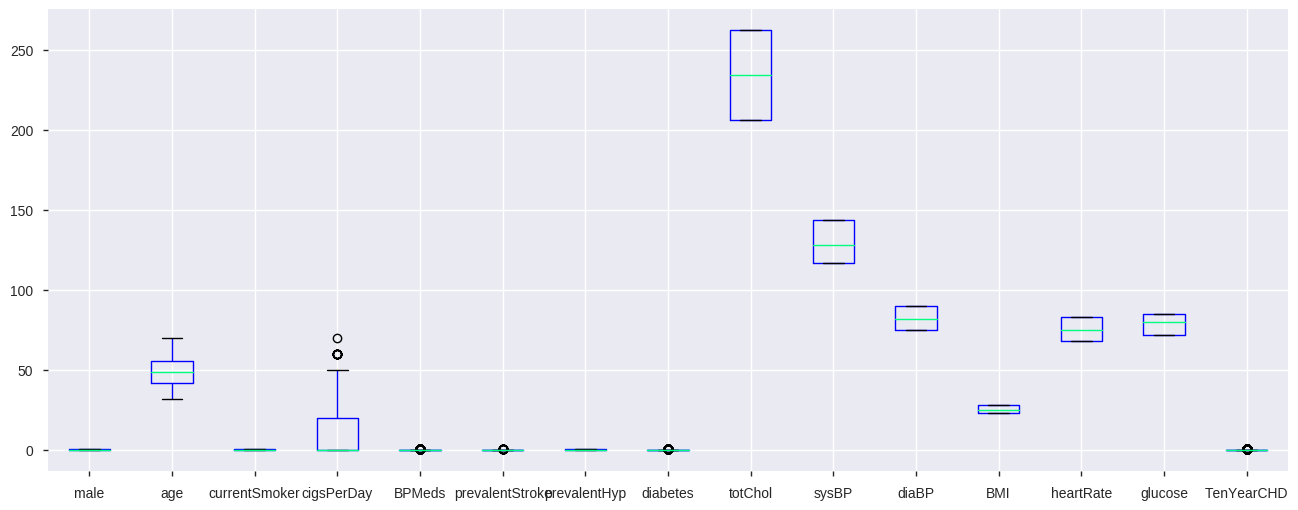

In [0]:
df.plot(kind='box', stacked=True, figsize=[16,6], colormap='winter') 

In [0]:
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

In [0]:
#BUILD A LOGISTIC REGRESSION MODEL
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)
#lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight = 'balanced')
lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight=None)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(2968, 8)

(1272, 8)

(2968,)

(1272,)

In [0]:
#FITTING A LOGISTIC REGRESSION MODEL
lmod.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [0]:
lmod.coef_

array([[ 0.49783509,  0.07183876,  0.01994505,  0.62780736,  0.68878429,
         0.74539745,  0.00576743, -0.00111865]])

In [0]:
#FIND OUT KEY PREDICTOR OF CHURN
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lmod.coef_))],axis=1)

In [0]:
coeff.columns=("variables","coeff")
coeff.sort_values("variables",ascending=True)

,variables,coeff
1,age,0.071839
2,cigsPerDay,0.019945
5,diabetes,0.745397
7,glucose,-0.001119
6,heartRate,0.005767
0,male,0.497835
4,prevalentHyp,0.688784
3,prevalentStroke,0.627807


In [0]:
#GENERATE MODEL DIAGNOSTICS
classes=lmod.predict(test_x)
print(classes.size)

1272


In [0]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 196
Negative cases in Test Data: 1076


In [0]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.8522012578616353


In [0]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))


precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1076
           1       0.75      0.06      0.11       196

    accuracy                           0.85      1272
   macro avg       0.80      0.53      0.52      1272
weighted avg       0.84      0.85      0.80      1272



In [0]:
#AUC
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

AUC


0.5287535088384796

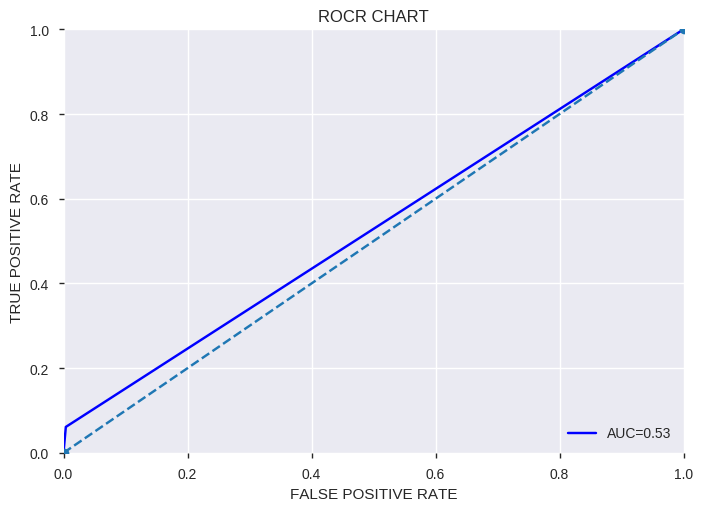

In [0]:
#ROC CHART
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();


CONFUSION MATRIX


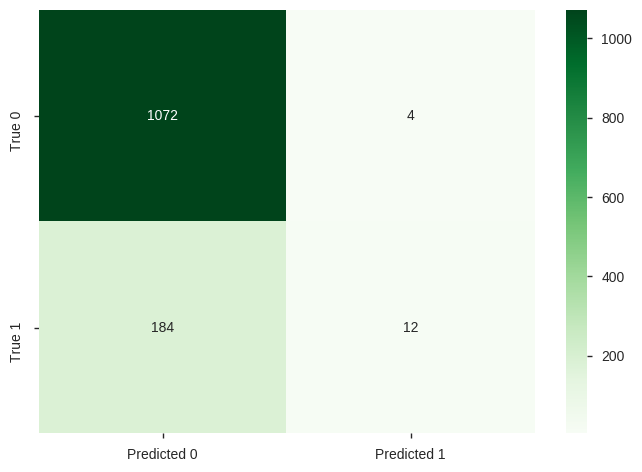

In [0]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [0]:
#FIND OUT PROBABLITY PF THE CLASSES AND PREDICTED CLASSES
predicted_prob=lmod.predict_proba(test_x)
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_classes_df=pd.DataFrame(classes)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df],axis=1)
predicted_df.columns=['prob_0','prob_1','class']
predicted_df.sample(10)

,prob_0,prob_1,class
1077,0.938314,0.061686,0
196,0.966222,0.033778,0
927,0.813198,0.186802,0
194,0.822569,0.177431,0
477,0.867830,0.132170,0
1079,0.967241,0.032759,0
1229,0.734642,0.265358,0
793,0.919747,0.080253,0
183,0.932219,0.067781,0
151,0.884725,0.115275,0


In [0]:
predicted_df.groupby('class').size()

class
0    1256
1      16
dtype: int64

In [0]:
#APPLY NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL
new_y_test=predicted_prob[:,1]>=0.2
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1076
           1       0.33      0.53      0.40       196

    accuracy                           0.76      1272
   macro avg       0.62      0.67      0.63      1272
weighted avg       0.81      0.76      0.78      1272



In [0]:
#AUC
print("AUC")
auc=metrics.roc_auc_score(test_y,new_y_test)
auc

AUC


0.6658637432668235

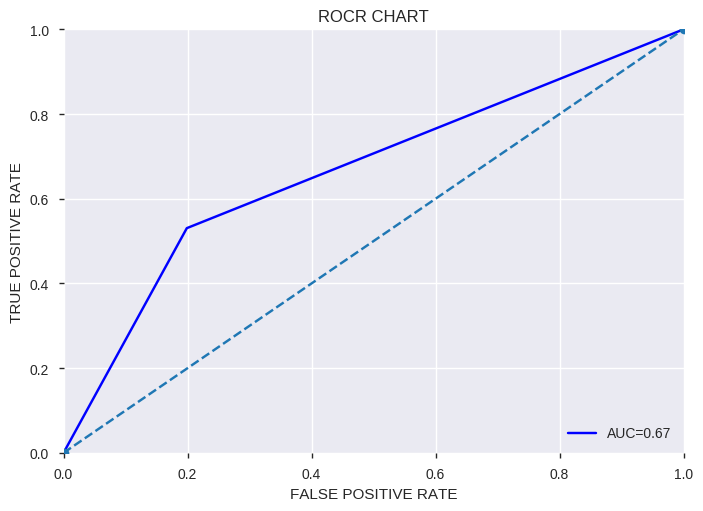

In [0]:
#ROC CHART
fpr,tpr,th=roc_curve(test_y,new_y_test)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();

CONFUSION MATRIX


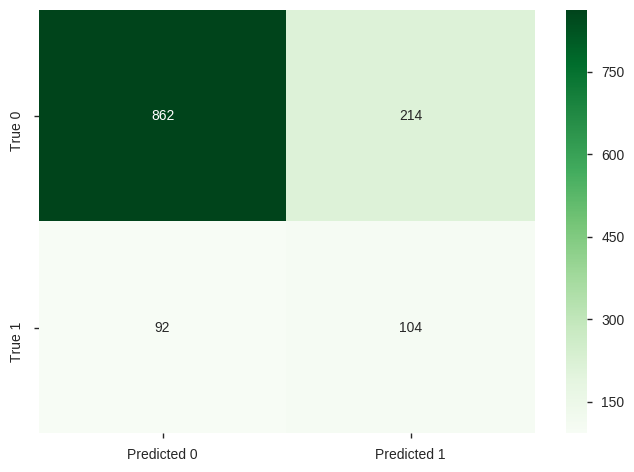

In [0]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,new_y_test)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
import seaborn as sns
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()